In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from tqdm.notebook import tqdm

In [2]:
path = '../data/-1 cases/'
os.chdir(path)
files = glob.glob('*.csv')
print(files)

['EX1013.merged.csv', 'EX1033.merged.csv', 'EX1053.merged.csv', 'EX132.merged.csv', 'EX280.merged.csv', 'EX779.merged.csv', 'EX855.merged.csv', 'EX886.merged.csv', 'EX887.merged.csv', 'EX888.merged.csv', 'EX975.merged.csv', 'EX977.merged.csv', 'EX981.merged.csv', 'EX988.merged.csv', 'EX997.merged.csv']


In [3]:
# function to isolate no. of mutations
def mut_count(file, chr_list):

    # created the dataframe
    df = pd.read_csv(file, low_memory=False)
    df = df.iloc[:, 77]  # only the chr column
    name = file[:-4]     # name of the input file

     
    chr_count = []
    chr_values = df.value_counts()
    chr_names = df.unique().tolist()

    # counts no. of mutation in each chr
    for gene in chr_list:
        if gene in chr_names:
            chr_count.append(chr_values[gene])
        else:
            chr_count.append(0)

    # creates the mutation count dataframe
    dic = {'Chromosome': chr_list, name: chr_count}
    df_chr = pd.DataFrame.from_dict(dic)

    return(df_chr)

In [8]:
df = pd.read_csv(files[1])
chr_names_list = df.iloc[:, 77].unique().tolist()

# start col
result = mut_count(files[0], chr_names_list)

#merging results
for file in tqdm(files[1:]):
    tmp = mut_count(file, chr_names_list)
    result = pd.concat([result, tmp.iloc[:,1]], axis=1)
    
#df.to_csv('mut_count_all.csv', index=False)
result.to_csv('mut_count_negative.csv', index=False)
result 

  0%|          | 0/14 [00:00<?, ?it/s]

,Chromosome,EX1013.merged,EX1033.merged,EX1053.merged,EX132.merged,EX280.merged,EX779.merged,EX855.merged,EX886.merged,EX887.merged,EX888.merged,EX975.merged,EX977.merged,EX981.merged,EX988.merged,EX997.merged
0,chr1,13362,13447,12863,2504,12519,15955,14878,12893,12890,13321,12724,13059,12707,13137,12599
1,chr2,9285,10089,9761,1567,9516,11987,10916,9669,9596,9865,8996,8799,9201,9576,9322
2,chr3,7538,7707,7482,1242,7137,9191,8734,7341,6852,7264,6408,7252,7443,7533,6905
3,chr4,5616,5847,5636,846,5525,7760,6379,5470,5453,5545,5584,5458,5433,5517,5465
4,chr5,5623,6153,6137,1044,5686,8076,6592,5919,5984,6098,5634,6070,6027,5945,5635
5,chr6,5672,6397,6278,970,5974,7381,6497,5656,6011,5194,5124,5941,5909,5858,5710
6,chr7,7030,7908,7642,1138,7272,8426,8185,6869,7328,7192,6553,7160,7206,7567,7106
7,chr8,4929,4819,4873,757,4717,6704,5718,4904,4723,5061,4954,4673,4923,4743,4473
8,chr9,5538,5811,5762,944,5185,6746,6346,5144,5506,5474,4616,5613,5640,5506,5357
9,chr10,5518,6298,6032,919,5693,6927,6922,5848,6056,6263,5866,5613,5964,6074,5958


In [9]:
#result.iloc[:,1:].mean().mean()
result.iloc[:,1:].max().max()

15955

In [10]:
res_norm = result.iloc[:,1:]/result.iloc[:,1:].max().max()

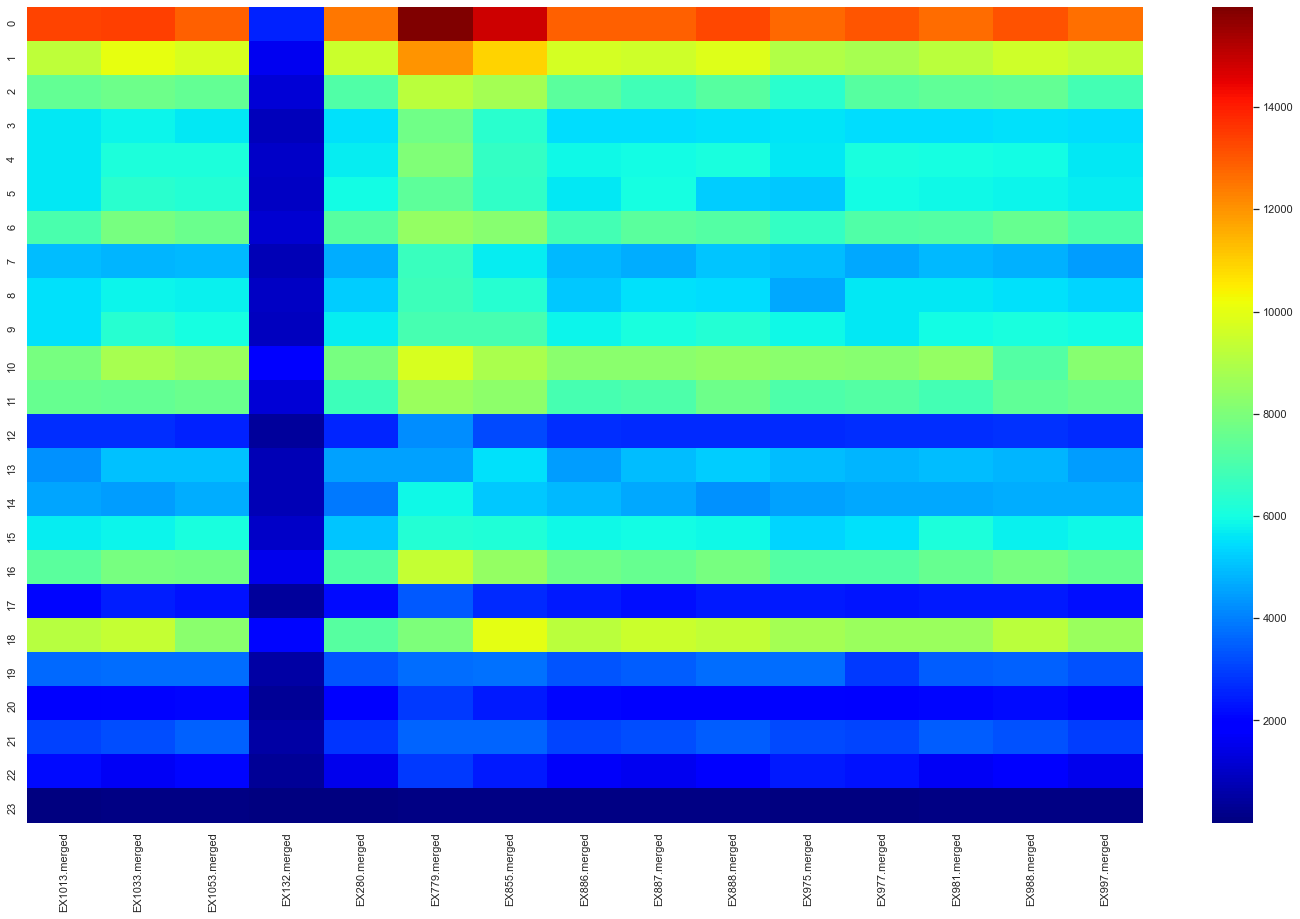

In [11]:

sns.set(rc={'figure.figsize':(25,15)})
ax = sns.heatmap(result.iloc[:,1:], cmap='jet')
#res_norm = result.iloc[:,1:]/result.iloc[:,1:].max().max()
#ax = sns.heatmap(res_norm, cmap='jet')

In [1]:
fig = px.imshow(result.iloc[:,1:])
fig.show()

NameError: name 'px' is not defined

In [ ]:
for file in files:
    new_file = file.replace('.merged', '')
    os.rename(file, new_file)